In [1]:
%pylab inline
from collections import Counter, defaultdict
import pandas as pd
import glob
import os
import seaborn as sns
sns.set_context('paper', font_scale=2)
sns.set_style('white')
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA


Populating the interactive namespace from numpy and matplotlib


In [4]:
columns = Counter()
for f in glob.glob('../cross-species-data/SRP007412-*'):
    if 'kallisto' in f:
        continue
    columns += Counter(pd.read_table(f).columns.tolist())
    

In [5]:
pd.Series(columns).sort_values()

cb_M_2        1
br_F_2        1
kd_M_2        2
ht_M_2        2
br_M_5        2
br_M_4        2
br_M_3        2
lv_M_2        2
br_M_2        4
ts_M_2        6
cb_M_1        9
lv_F_1        9
ts_M_1        9
target_id    10
kd_F_1       10
ht_M_1       10
ht_F_1       10
cb_F_1       10
br_M_1       10
br_F_1       10
kd_M_1       10
lv_M_1       10
dtype: int64

In [163]:
SRP007412_cols_to_use = [#'cb_M_1', 'lv_F_1', 'ts_M_1', 'target_id', 
                         'kd_F_1', 'ht_M_1',
                         'ht_F_1', 'cb_F_1', 'br_M_1',
                         'br_F_1', 'kd_M_1', 'lv_M_1']


In [14]:
columns = Counter()
for f in glob.glob('../cross-species-data/SRP016501-*'):
    if 'kallisto' in f:
        continue
    columns += Counter(pd.read_table(f).columns.tolist())
    

In [15]:
pd.Series(columns).sort_values()

b_heart      4
target_id    5
c_skm        5
c_lung       5
c_liver      5
c_kidney     5
c_heart      5
c_colon      5
c_brain      5
b_testes     5
b_spleen     5
b_skm        5
b_lung       5
b_liver      5
b_kidney     5
b_colon      5
b_brain      5
a_testes     5
a_spleen     5
a_skm        5
a_lung       5
a_liver      5
a_kidney     5
a_heart      5
a_colon      5
a_brain      5
c_spleen     5
c_testes     5
dtype: int64

# Clustering

In [226]:
second_species = 'hsapiens'
mouse_human_ortho = pd.read_table('../ortholog_tsv/mmusculus_hsapiens.tsv')[['ensembl_gene_id', '{}_homolog_ensembl_gene'.format(second_species), '{}_homolog_orthology_type'.format(second_species)]].set_index('ensembl_gene_id')

In [31]:
mouse_human_ortho = mouse_human_ortho[mouse_human_ortho.hsapiens_homolog_orthology_type=='ortholog_one2one']


In [32]:
mouse_human_ortho

,hsapiens_homolog_ensembl_gene,hsapiens_homolog_orthology_type
ensembl_gene_id,,
ENSMUSG00000064370,ENSG00000198727,ortholog_one2one
ENSMUSG00000064368,ENSG00000198695,ortholog_one2one
ENSMUSG00000064367,ENSG00000198786,ortholog_one2one
ENSMUSG00000064363,ENSG00000198886,ortholog_one2one
ENSMUSG00000065947,ENSG00000212907,ortholog_one2one
ENSMUSG00000064360,ENSG00000198840,ortholog_one2one
ENSMUSG00000064358,ENSG00000198938,ortholog_one2one
ENSMUSG00000064357,ENSG00000198899,ortholog_one2one
ENSMUSG00000064356,ENSG00000228253,ortholog_one2one


In [164]:
human_tpm = pd.read_table('../cross-species-data/SRP007412-homo_sapiens_kallisto_gene_tables.tsv')
human_tpm = human_tpm.loc[:, SRP007412_cols_to_use]
human_tpm.columns = ['hsapiens_{}'.format(x) for x in human_tpm.columns]
human_tpm = human_tpm.loc[mouse_human_ortho.hsapiens_homolog_ensembl_gene].dropna()


/home/cmb-panasas2/skchoudh/software_frozen/anaconda27/envs/scanpy/lib/python3.6/site-packages/ipykernel/__main__.py:4: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


In [165]:
human_tpm

,hsapiens_kd_F_1,hsapiens_ht_M_1,hsapiens_ht_F_1,hsapiens_cb_F_1,hsapiens_br_M_1,hsapiens_br_F_1,hsapiens_kd_M_1,hsapiens_lv_M_1
ENSG00000198727,197361.000000,4.764090e+05,5.555060e+05,182299.000000,165581.000000,103154.000000,234793.000000,440868.000000
ENSG00000198695,41812.700000,4.136680e+04,1.032780e+05,50448.600000,32103.700000,25785.700000,24352.800000,56568.600000
ENSG00000198786,131915.000000,1.706480e+05,2.849650e+05,131956.000000,97307.600000,76874.300000,77404.200000,155032.000000
ENSG00000198886,352003.000000,7.556990e+05,9.178410e+05,323154.000000,297889.000000,203585.000000,415986.000000,790541.000000
ENSG00000212907,16865.900000,8.740690e+04,3.659400e+04,13115.000000,39028.800000,10777.000000,21854.000000,48770.900000
ENSG00000198840,33214.000000,3.272500e+04,1.152180e+05,22863.000000,29129.000000,23290.000000,60842.000000,85276.000000
ENSG00000198938,125604.000000,3.388210e+05,2.805460e+05,74130.600000,172335.000000,110589.000000,331436.000000,397148.000000
ENSG00000198899,228178.000000,4.538920e+05,6.341240e+05,207722.000000,161261.000000,131139.000000,200518.000000,418264.000000
ENSG00000228253,1135.950000,7.459540e+02,3.680270e+03,1036.910000,19091.900000,1171.000000,583.968000,2112.840000
ENSG00000198712,140308.000000,2.829020e+05,3.013890e+05,124677.000000,185783.000000,122546.000000,276547.000000,386303.000000


In [167]:
mouse_tpm = pd.read_table('../cross-species-data/SRP007412-mus_musculus_kallisto_gene_tables.tsv')
mouse_tpm = mouse_tpm.loc[:, SRP007412_cols_to_use]
mouse_tpm.columns = ['mmusculus_{}'.format(x) for x in mouse_tpm.columns]
mouse_tpm = mouse_tpm.loc[mouse_human_ortho.index.tolist()].dropna()

/home/cmb-panasas2/skchoudh/software_frozen/anaconda27/envs/scanpy/lib/python3.6/site-packages/ipykernel/__main__.py:4: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


In [168]:
new_index_genes = mouse_tpm.index
reduced_set = mouse_human_ortho.loc[new_index_genes]
reduced_set = reduced_set.loc[reduced_set.hsapiens_homolog_ensembl_gene.isin(human_tpm.index)]
mouse_tpm_reduced = mouse_tpm.loc[reduced_set.index]
human_tpm_reduced = human_tpm.loc[reduced_set.hsapiens_homolog_ensembl_gene]

In [169]:
human_tpm_T = human_tpm_reduced.T
human_tpm_T.columns = mouse_tpm_reduced.T.columns.tolist()

In [170]:
human_mouse_tpm_concat = pd.concat([mouse_tpm_reduced.T, human_tpm_T], ignore_index=False)

In [171]:
human_mouse_tpm_concat

,ENSMUSG00000064370,ENSMUSG00000064368,ENSMUSG00000064367,ENSMUSG00000064363,ENSMUSG00000065947,ENSMUSG00000064360,ENSMUSG00000064358,ENSMUSG00000064357,ENSMUSG00000064356,ENSMUSG00000064354,...,ENSMUSG00000057751,ENSMUSG00000000378,ENSMUSG00000036737,ENSMUSG00000038121,ENSMUSG00000020134,ENSMUSG00000029090,ENSMUSG00000031844,ENSMUSG00000051319,ENSMUSG00000086361,ENSMUSG00000030057
mmusculus_kd_F_1,531066.0,66661.3,349728.0,324682.0,23793.0,7882.600,85234.5,162470.0,3747.000,88638.5,...,17.999997,373.999600,1498.99700,3305.00500,551.00030,1782.01663,64.000020,205.00000,0.00000,3604.470600
mmusculus_ht_M_1,427324.0,48646.9,325431.0,350991.0,32371.0,6456.750,384618.0,209491.0,717.000,271393.0,...,57.999961,366.000390,1109.99661,3810.99990,203.99954,412.00025,1.000000,196.00000,1.00000,3068.398900
mmusculus_ht_F_1,859087.0,130122.0,712100.0,516273.0,32383.0,14337.900,167475.0,206038.0,5883.000,242702.0,...,334.999650,493.999780,1797.99840,4383.99960,360.99957,729.24549,1.000000,439.00000,0.00000,4564.582300
mmusculus_cb_F_1,132622.0,21800.9,102741.0,95606.0,8714.0,3311.590,16897.3,44659.4,805.000,52570.7,...,176.000460,903.999840,2337.99520,1177.00110,768.16690,558.06452,28.000000,336.00000,5.00000,3591.094500
mmusculus_br_M_1,208849.0,22146.0,128289.0,182510.0,13661.0,5761.380,181637.0,38213.2,916.000,127327.0,...,416.000126,2360.995410,2869.00090,2027.00320,1940.09260,1102.13082,6.000000,574.00000,20.67550,8491.701000
mmusculus_br_F_1,98754.9,11737.0,64859.1,89592.0,7143.0,4595.540,78451.5,39998.9,408.000,34573.0,...,144.999970,852.000310,1103.99603,804.00050,683.00040,403.06951,2.000000,171.00000,7.93261,3123.396950
mmusculus_kd_M_1,219818.0,20720.9,149864.0,153438.0,16321.0,2632.370,151630.0,34876.3,467.000,85627.3,...,10.000000,293.999920,760.99979,2397.00070,257.07310,1575.00270,194.000230,152.00000,0.00000,2338.144370
mmusculus_lv_M_1,51991.0,4662.0,32621.1,39607.0,3900.0,844.344,35468.1,18248.3,197.000,27513.6,...,54.000027,336.999550,335.99979,729.00010,177.00006,525.99993,1719.998520,70.00000,0.00000,2094.012430
hsapiens_kd_F_1,197361.0,41812.7,131915.0,352003.0,16865.9,33214.000,125604.0,228178.0,1135.950,140308.0,...,230.000480,698.222105,876.00000,275.90632,130.99987,652.78927,23.868061,464.29700,0.00000,2683.995410
hsapiens_ht_M_1,476409.0,41366.8,170648.0,755699.0,87406.9,32725.000,338821.0,453892.0,745.954,282902.0,...,602.999700,734.749391,553.00000,561.74656,90.00001,584.93415,23.814600,707.51970,0.00000,5120.002250


In [172]:
human_mouse_tpm_concat_clean = human_mouse_tpm_concat.dropna()
human_mouse_tpm_concat_clean

,ENSMUSG00000064370,ENSMUSG00000064368,ENSMUSG00000064367,ENSMUSG00000064363,ENSMUSG00000065947,ENSMUSG00000064360,ENSMUSG00000064358,ENSMUSG00000064357,ENSMUSG00000064356,ENSMUSG00000064354,...,ENSMUSG00000057751,ENSMUSG00000000378,ENSMUSG00000036737,ENSMUSG00000038121,ENSMUSG00000020134,ENSMUSG00000029090,ENSMUSG00000031844,ENSMUSG00000051319,ENSMUSG00000086361,ENSMUSG00000030057
mmusculus_kd_F_1,531066.0,66661.3,349728.0,324682.0,23793.0,7882.600,85234.5,162470.0,3747.000,88638.5,...,17.999997,373.999600,1498.99700,3305.00500,551.00030,1782.01663,64.000020,205.00000,0.00000,3604.470600
mmusculus_ht_M_1,427324.0,48646.9,325431.0,350991.0,32371.0,6456.750,384618.0,209491.0,717.000,271393.0,...,57.999961,366.000390,1109.99661,3810.99990,203.99954,412.00025,1.000000,196.00000,1.00000,3068.398900
mmusculus_ht_F_1,859087.0,130122.0,712100.0,516273.0,32383.0,14337.900,167475.0,206038.0,5883.000,242702.0,...,334.999650,493.999780,1797.99840,4383.99960,360.99957,729.24549,1.000000,439.00000,0.00000,4564.582300
mmusculus_cb_F_1,132622.0,21800.9,102741.0,95606.0,8714.0,3311.590,16897.3,44659.4,805.000,52570.7,...,176.000460,903.999840,2337.99520,1177.00110,768.16690,558.06452,28.000000,336.00000,5.00000,3591.094500
mmusculus_br_M_1,208849.0,22146.0,128289.0,182510.0,13661.0,5761.380,181637.0,38213.2,916.000,127327.0,...,416.000126,2360.995410,2869.00090,2027.00320,1940.09260,1102.13082,6.000000,574.00000,20.67550,8491.701000
mmusculus_br_F_1,98754.9,11737.0,64859.1,89592.0,7143.0,4595.540,78451.5,39998.9,408.000,34573.0,...,144.999970,852.000310,1103.99603,804.00050,683.00040,403.06951,2.000000,171.00000,7.93261,3123.396950
mmusculus_kd_M_1,219818.0,20720.9,149864.0,153438.0,16321.0,2632.370,151630.0,34876.3,467.000,85627.3,...,10.000000,293.999920,760.99979,2397.00070,257.07310,1575.00270,194.000230,152.00000,0.00000,2338.144370
mmusculus_lv_M_1,51991.0,4662.0,32621.1,39607.0,3900.0,844.344,35468.1,18248.3,197.000,27513.6,...,54.000027,336.999550,335.99979,729.00010,177.00006,525.99993,1719.998520,70.00000,0.00000,2094.012430
hsapiens_kd_F_1,197361.0,41812.7,131915.0,352003.0,16865.9,33214.000,125604.0,228178.0,1135.950,140308.0,...,230.000480,698.222105,876.00000,275.90632,130.99987,652.78927,23.868061,464.29700,0.00000,2683.995410
hsapiens_ht_M_1,476409.0,41366.8,170648.0,755699.0,87406.9,32725.000,338821.0,453892.0,745.954,282902.0,...,602.999700,734.749391,553.00000,561.74656,90.00001,584.93415,23.814600,707.51970,0.00000,5120.002250


In [173]:
human_mouse_tpm_concat_clean.mean(axis=1)

mmusculus_kd_F_1    1283.295462
mmusculus_ht_M_1     926.345044
mmusculus_ht_F_1    1645.331612
mmusculus_cb_F_1    1558.614591
mmusculus_br_M_1    2695.976524
mmusculus_br_F_1     974.866318
mmusculus_kd_M_1     810.586394
mmusculus_lv_M_1     589.993613
hsapiens_kd_F_1      889.993659
hsapiens_ht_M_1     1137.996403
hsapiens_ht_F_1      920.299321
hsapiens_cb_F_1     1153.074512
hsapiens_br_M_1      867.060686
hsapiens_br_F_1     1030.056676
hsapiens_kd_M_1      748.957204
hsapiens_lv_M_1     1450.301479
dtype: float64

In [174]:
human_mouse_tpm_concat_clean.std(axis=1)

mmusculus_kd_F_1    10975.303294
mmusculus_ht_M_1    13393.002087
mmusculus_ht_F_1    25402.894116
mmusculus_cb_F_1     4881.775135
mmusculus_br_M_1     8141.814915
mmusculus_br_F_1     3229.981001
mmusculus_kd_M_1     5224.293523
mmusculus_lv_M_1     7882.547924
hsapiens_kd_F_1      6501.813809
hsapiens_ht_M_1     17344.379371
hsapiens_ht_F_1     16212.735699
hsapiens_cb_F_1      5782.133901
hsapiens_br_M_1      6381.182936
hsapiens_br_F_1      4869.219906
hsapiens_kd_M_1      7985.107277
hsapiens_lv_M_1     31578.248204
dtype: float64

In [175]:
# Standardize data, else the scaled appear very bloated
human_mouse_tpm_concat_clean_centered = human_mouse_tpm_concat_clean.sub(human_mouse_tpm_concat_clean.mean(axis=1), axis=0)
human_mouse_tpm_concat_clean_centered = human_mouse_tpm_concat_clean_centered.div(human_mouse_tpm_concat_clean_centered.std(axis=1), axis=0)

In [176]:
human_mouse_tpm_concat_clean_centered.std(axis=1)

mmusculus_kd_F_1    1.0
mmusculus_ht_M_1    1.0
mmusculus_ht_F_1    1.0
mmusculus_cb_F_1    1.0
mmusculus_br_M_1    1.0
mmusculus_br_F_1    1.0
mmusculus_kd_M_1    1.0
mmusculus_lv_M_1    1.0
hsapiens_kd_F_1     1.0
hsapiens_ht_M_1     1.0
hsapiens_ht_F_1     1.0
hsapiens_cb_F_1     1.0
hsapiens_br_M_1     1.0
hsapiens_br_F_1     1.0
hsapiens_kd_M_1     1.0
hsapiens_lv_M_1     1.0
dtype: float64

In [222]:
human_mouse_tpm_concat_clean_centered.shape

(16, 15833)

explained variance ratio (first two components): [3.51906205e-01 2.08205649e-01 1.54778835e-01 1.08925941e-01
 5.60552176e-02 3.52134178e-02 3.02101231e-02 1.67139023e-02
 1.21687124e-02 1.01031656e-02 7.17654102e-03 3.75290085e-03
 2.20562205e-03 1.64354947e-03 9.40217660e-04 8.54528567e-33]


Text(0.5, 1.0, 'PCA')

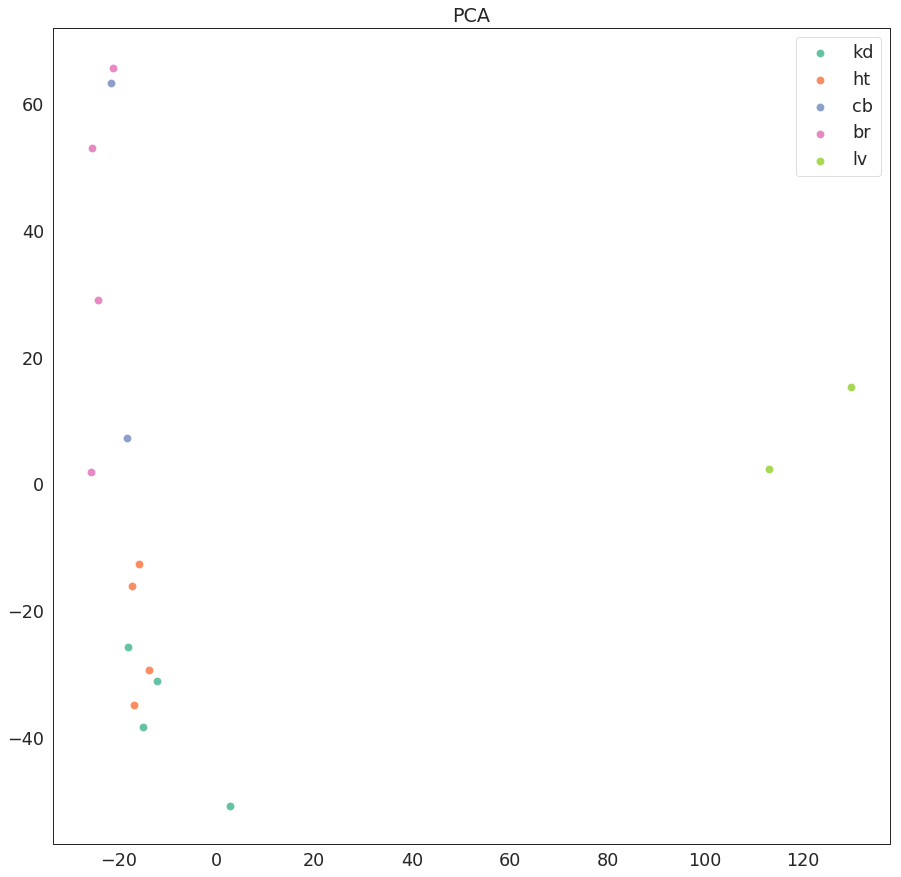

In [219]:

X = human_mouse_tpm_concat_clean_centered.values
y = human_mouse_tpm_concat_clean_centered.index
target_names = human_mouse_tpm_concat_clean_centered.index
pca = PCA(n_components=16)

X_r = pca.fit(X).transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

fig, ax = plt.subplots(figsize=(15, 15))
colors = sns.color_palette('Paired')
lw = 2

#for color, i, target_name in zip(colors, [0, 1, 2], target_names):
#ax.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
#            label=target_name)
colors = {}
indexes = defaultdict(list)
all_species = {}
row_colors = []
for index, target_name in enumerate(target_names):
    species, tissue = target_name.split('_')[:2]
    #if tissue == 'br':
    #    continue
    #if tissue == 'lv':
    #    continue
    if tissue not in colors.keys():
        colors[tissue] = sns.color_palette('Set2')[len(colors)]
    row_colors.append(colors[tissue])
    indexes[tissue].append(index)
    all_species[index] = species

for tissue, values in indexes.items():
    #for index in 
    #sepcies =  all_species[]
    #if species == 'hsapiens':
    ax.scatter(X_r[values,0], X_r[values, 1], color=colors[tissue], marker='o', label=tissue, lw=3)
    #else:
    #    ax.scatter(X_r[values,0], X_r[values, 1], color=colors[tissue], marker='x', label=tissue, lw=3)
ax.legend(loc='best', shadow=False, scatterpoints=1)
ax.set_title('PCA')

# Exclude lung samples from PCA

In [178]:
X_remove_lv = np.delete(X, indexes['lv'], axis=0)
y_remove_lv = np.delete()

TypeError: delete() missing 2 required positional arguments: 'arr' and 'obj'

In [179]:
target_names

Index(['mmusculus_kd_F_1', 'mmusculus_ht_M_1', 'mmusculus_ht_F_1',
       'mmusculus_cb_F_1', 'mmusculus_br_M_1', 'mmusculus_br_F_1',
       'mmusculus_kd_M_1', 'mmusculus_lv_M_1', 'hsapiens_kd_F_1',
       'hsapiens_ht_M_1', 'hsapiens_ht_F_1', 'hsapiens_cb_F_1',
       'hsapiens_br_M_1', 'hsapiens_br_F_1', 'hsapiens_kd_M_1',
       'hsapiens_lv_M_1'],
      dtype='object')

explained variance ratio (first two components): [0.32613483 0.24196497]


Text(0.5, 1.0, 'PCA')

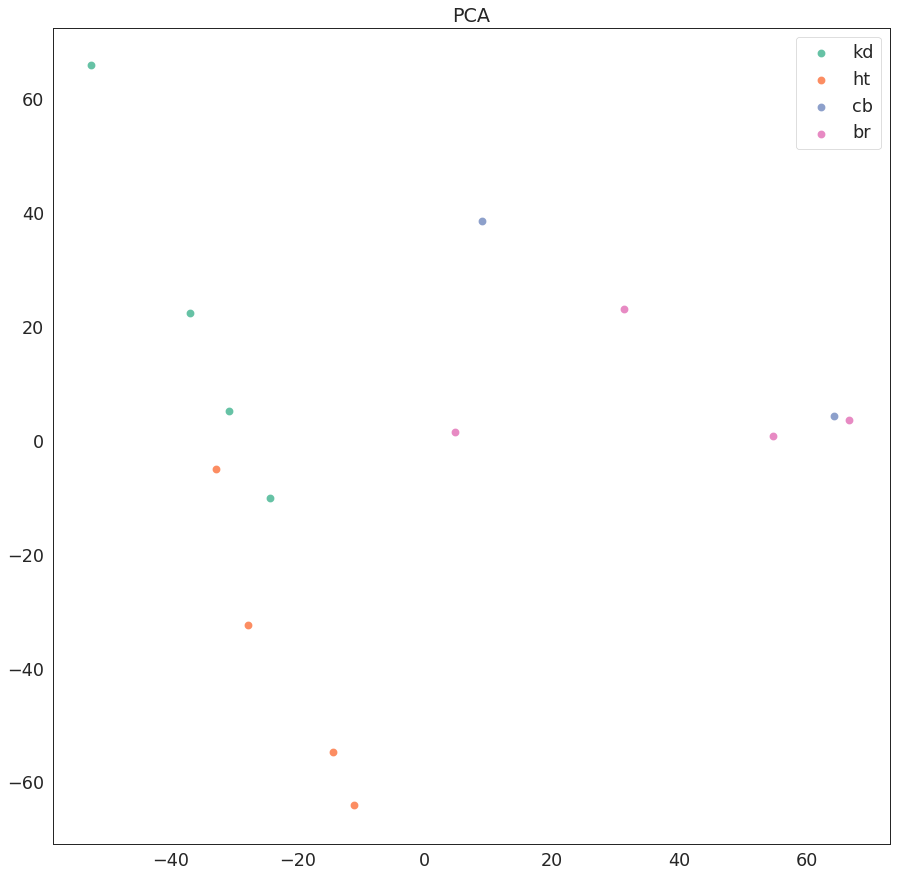

In [180]:
target_names = np.delete(np.array(human_mouse_tpm_concat_clean.index), indexes['lv'])
pca = PCA(n_components=2)

X_r = pca.fit(X_remove_lv).transform(X_remove_lv)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

fig, ax = plt.subplots(figsize=(15, 15))
colors = sns.color_palette('Paired')
lw = 2

#for color, i, target_name in zip(colors, [0, 1, 2], target_names):
#ax.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
#            label=target_name)
colors = {}
indexes = defaultdict(list)
all_species = {}
row_colors = []
for index, target_name in enumerate(target_names):
    species, tissue = target_name.split('_')[:2]
    #if tissue == 'br':
    #    continue
    #if tissue == 'lv':
    #    continue
    if tissue not in colors.keys():
        color = sns.color_palette('Set2')[len(colors)]
        colors[tissue] = color
    else:
        color = colors[tissue]
    row_colors.append(color)
    indexes[tissue].append(index)
    all_species[index] = species

for tissue, values in indexes.items():
    #for index in 
    #sepcies =  all_species[]
    #if species == 'hsapiens':
    ax.scatter(X_r[values,0], X_r[values, 1], color=colors[tissue], marker='o', label=tissue, lw=3)
    #else:
    #    ax.scatter(X_r[values,0], X_r[values, 1], color=colors[tissue], marker='x', label=tissue, lw=3)
ax.legend(loc='best', shadow=False, scatterpoints=1)
ax.set_title('PCA')

In [181]:
human_mouse_tpm_concat_clean_centered

,ENSMUSG00000064370,ENSMUSG00000064368,ENSMUSG00000064367,ENSMUSG00000064363,ENSMUSG00000065947,ENSMUSG00000064360,ENSMUSG00000064358,ENSMUSG00000064357,ENSMUSG00000064356,ENSMUSG00000064354,...,ENSMUSG00000057751,ENSMUSG00000000378,ENSMUSG00000036737,ENSMUSG00000038121,ENSMUSG00000020134,ENSMUSG00000029090,ENSMUSG00000031844,ENSMUSG00000051319,ENSMUSG00000086361,ENSMUSG00000030057
mmusculus_kd_F_1,48.270439,5.956829,31.748071,29.466038,2.050941,0.601287,7.649101,14.686310,0.224477,7.959252,...,-0.115286,-0.082849,0.019653,0.184205,-0.066722,0.045440,-0.111094,-0.098247,-0.116926,0.211491
mmusculus_ht_M_1,31.837347,3.563096,24.229419,26.137878,2.347842,0.412932,28.648667,15.572659,-0.015631,20.194625,...,-0.064836,-0.041839,0.013713,0.215385,-0.053935,-0.038404,-0.069092,-0.054532,-0.069092,0.159938
mmusculus_ht_F_1,33.753700,5.057560,27.967470,20.258624,1.210007,0.499650,6.527983,8.046039,0.166818,9.489339,...,-0.051582,-0.045323,0.006010,0.107809,-0.050558,-0.036062,-0.064730,-0.047488,-0.064769,0.114918
mmusculus_cb_F_1,26.847485,4.146501,20.726556,19.264997,1.465734,0.359086,3.142030,8.828917,-0.154373,10.449495,...,-0.283220,-0.134094,0.159651,-0.078171,-0.161918,-0.204956,-0.313536,-0.250445,-0.318248,0.416340
mmusculus_br_M_1,25.320279,2.388905,15.425679,22.085251,1.346754,0.376501,21.978026,4.362323,-0.218622,15.307524,...,-0.280033,-0.041143,0.021251,-0.082165,-0.092840,-0.195760,-0.330390,-0.260627,-0.328588,0.711847
mmusculus_br_F_1,30.272634,3.331950,19.778517,27.435806,1.909650,1.120958,23.986715,12.081815,-0.175501,10.401960,...,-0.256926,-0.038039,0.039978,-0.052900,-0.090361,-0.177028,-0.301199,-0.248876,-0.299362,0.665184
mmusculus_kd_M_1,41.920963,3.811102,28.530827,29.214938,2.968902,0.348714,28.868863,6.520635,-0.065767,16.235059,...,-0.153243,-0.098882,-0.009492,0.303661,-0.105950,0.146320,-0.118023,-0.126062,-0.155157,0.292395
mmusculus_lv_M_1,6.520862,0.516585,4.063547,4.949796,0.419916,0.032268,4.424725,2.240177,-0.049856,3.415597,...,-0.067998,-0.032095,-0.032222,0.017635,-0.052393,-0.008118,0.143355,-0.065968,-0.074848,0.190804
hsapiens_kd_F_1,30.217876,6.294045,20.152070,54.002316,2.457146,4.971537,19.181418,34.957631,0.037829,21.442940,...,-0.101509,-0.029495,-0.002152,-0.094449,-0.116736,-0.036483,-0.133213,-0.065474,-0.136884,0.275923
hsapiens_ht_M_1,27.402018,2.319414,9.773195,43.504641,4.973882,1.821167,19.469305,26.103788,-0.022603,16.245263,...,-0.030846,-0.023249,-0.033728,-0.033224,-0.060423,-0.031887,-0.064239,-0.024819,-0.065612,0.229585


In [182]:
len(row_colors)

14

In [183]:
human_mouse_tpm_concat_clean.shape

(16, 15833)

In [184]:
human_mouse_tpm_concat_clean.index

Index(['mmusculus_kd_F_1', 'mmusculus_ht_M_1', 'mmusculus_ht_F_1',
       'mmusculus_cb_F_1', 'mmusculus_br_M_1', 'mmusculus_br_F_1',
       'mmusculus_kd_M_1', 'mmusculus_lv_M_1', 'hsapiens_kd_F_1',
       'hsapiens_ht_M_1', 'hsapiens_ht_F_1', 'hsapiens_cb_F_1',
       'hsapiens_br_M_1', 'hsapiens_br_F_1', 'hsapiens_kd_M_1',
       'hsapiens_lv_M_1'],
      dtype='object')

<Figure size 576x576 with 0 Axes>

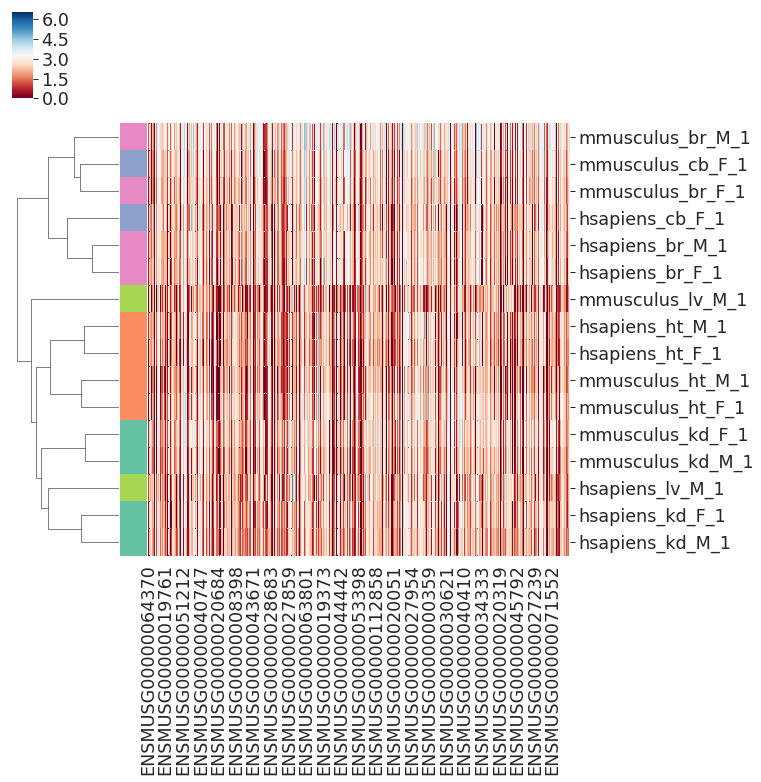

In [187]:
fig = plt.figure(figsize=(8,8))
sns.clustermap(np.log10(human_mouse_tpm_concat_clean+1), col_cluster=False, cmap='RdBu', metric='euclidean', row_colors=row_colors, )
fig.tight_layout()

<Figure size 576x576 with 0 Axes>

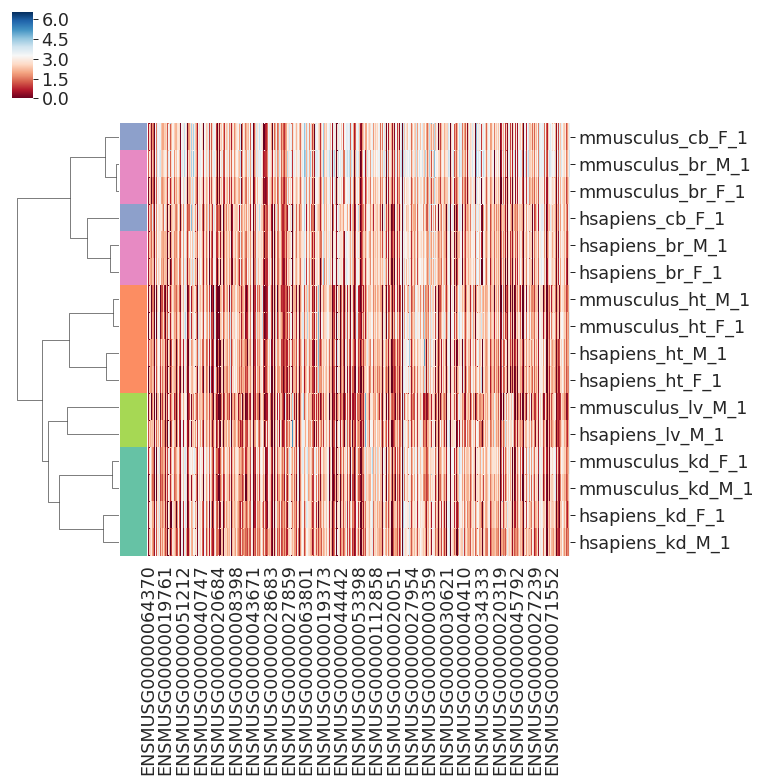

In [188]:
fig = plt.figure(figsize=(8,8))
sns.clustermap(np.log10(human_mouse_tpm_concat_clean+1), col_cluster=False, cmap='RdBu', metric='correlation', row_colors=row_colors, )
fig.tight_layout()

In [223]:
mouse_tpm_reduced.shape

(15833, 8)

# CCA

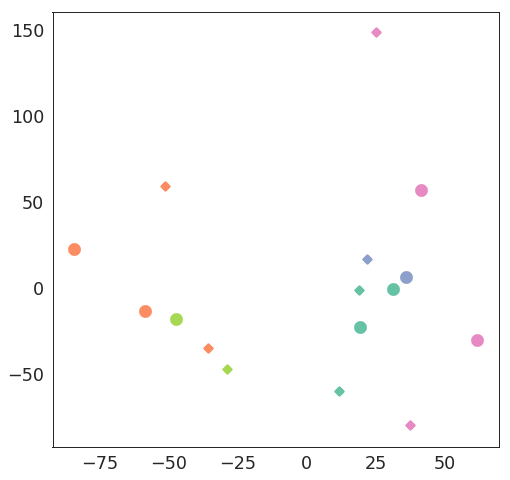

In [220]:
X = mouse_tpm_reduced.T
Y = human_tpm_reduced.T 

cca = CCA(n_components=2)
cca.fit(X, Y)


X_c, Y_c = cca.transform(X, Y)
fig, ax = plt.subplots(figsize=(8, 8))
for index in range(X_c.shape[0]):
    ax.scatter(X_c[index, 0], X_c[index, 1], color=row_colors[index], marker='x', lw=8)
for index in range(Y_c.shape[0]):
    ax.scatter(Y_c[index, 0], Y_c[index, 1], color=row_colors[index+X_c.shape[0]], marker='o', lw=8)


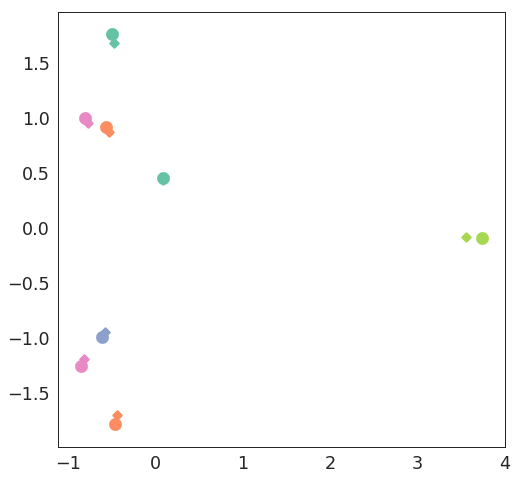

In [225]:
X = X_r[0:8,]
Y = X_r[8:,]

cca = CCA(n_components=2)
cca.fit(X, Y)


X_c, Y_c = cca.transform(X, Y)
fig, ax = plt.subplots(figsize=(8, 8))
for index in range(X_c.shape[0]):
    ax.scatter(X_c[index, 0], X_c[index, 1], color=row_colors[index], marker='x', lw=8)
for index in range(Y_c.shape[0]):
    ax.scatter(Y_c[index, 0], Y_c[index, 1], color=row_colors[index+X_c.shape[0]], marker='o', lw=8)

# WOAH WOAH WOAH WOAH WOAH!



In [152]:
from sklearn.cross_decomposition import CCA
X = mouse_tpm_reduced.T
Y = human_tpm_reduced.T 

cca = CCA(n_components=2)
cca.fit(X, Y)


X_c, Y_c = cca.transform(X, Y)
fig, ax = plt.subplots(figsize=(8, 8))
for index in range(X_c.shape[0]):
    ax.scatter(X_c[index, 0], X_c[index, 1], color=row_colors[index], marker='x', lw=8)
for index in range(Y_c.shape[0]):
    ax.scatter(Y_c[index, 0], Y_c[index, 1], color=row_colors[index+X_c.shape[0]], marker='o', lw=8)


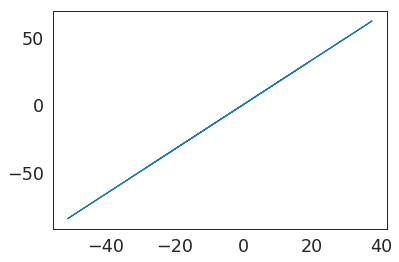

In [191]:
plt.plot(X_c[:, 0], Y_c[:, 0])

In [207]:
X_c.shape

(8, 2)

In [209]:
len(row_colors)

16

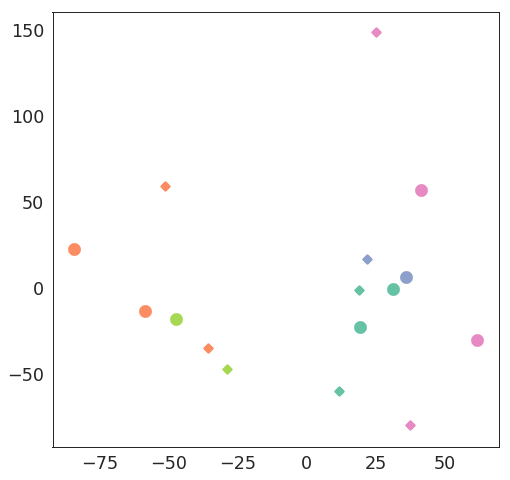

In [198]:
import numpy as np
import rcca


In [217]:
nComponents = 3
cca = rcca.CCA(kernelcca = False, reg = 0., numCC = nComponents)

# Use the train() method to find a CCA mapping between the two training sets.
cca.train([X, Y])

# Use the validate() method to test how well the CCA mapping generalizes to the test data.
# For each dimension in the test data, correlations between predicted and actual data are computed.


Training CCA, kernel = None, regularization = 0.0000, 3 components


LinAlgError: the leading minor of order 10 of 'b' is not positive definite. The factorization of 'b' could not be completed and no eigenvalues or eigenvectors were computed.

In [ ]:
plt.plot(np.arange(nComponents)+1, cca.cancorrs, 'ko')
plt.xlim(0.5, 0.5+nComponents)
plt.xticks(np.arange(nComponents)+1)
plt.xlabel('Canonical component')
plt.ylabel('Canonical correlation')
plt.title('Canonical correlations')
print ('''The canonical correlations are:\n
Component 1: %.02f\n
Component 2: %.02f\n
Component 3: %.02f\n
Component 4: %.02f\n
''' % tuple(cca.cancorrs))